In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import numpy as np
import pandas as pd
import warnings
import sys

sys.path.append("../src")
from margin_calibration import MarginCalibration

In [79]:
warnings.simplefilter("ignore")

# Dataset Generation

In [80]:
# Create a 100 random observations with their respective
# sampling weights, such that those weights sum to 20 %
n_obs = 100
sampling_probabilities = np.random.rand(n_obs, 1).flatten()
sampling_probabilities = sampling_probabilities / sampling_probabilities.sum() *.2

# Create a matrix of size n_obs * n_margins, with margins ranging from 0 to 1000
n_margins = 2 # Let say we have two variables
calibration_matrix = 1000*np.random.rand(n_obs, n_margins)

# Now we create the calibration target
# It is of sier n_margins * 1 and contains the 
# sums of the margins over all the population
calibration_target = np.array([np.sum(calibration_matrix[:, i])*100 for i in range(calibration_matrix.shape[1])])

# The costs should be of size of the number of margins
costs = (1,1) # We give here same costs to both variables

# Let say we want to work with want to work with pandas dataframes 
# instead of numpy arrays
sampling_probabilities = pd.DataFrame(sampling_probabilities, columns=["weights"])
calibration_matrix = pd.DataFrame(calibration_matrix, columns = ["margin1", "margin2"])
calibration_target = pd.DataFrame(calibration_target, columns = ["margin_sums"])

# Margin Calibration

In [81]:
mc=MarginCalibration()
mc_logit=MarginCalibration("logit", .5, 1.5)
mc_rr=MarginCalibration("raking_ratio")
mc_lt=MarginCalibration("truncated_linear", .5, 1.5)

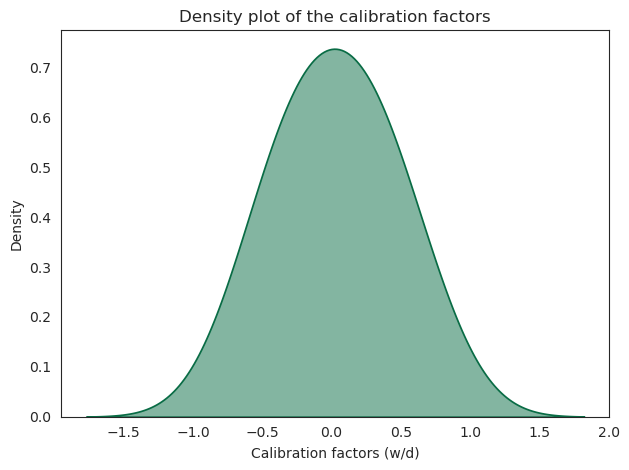

CPU times: user 7.69 s, sys: 23.6 ms, total: 7.71 s
Wall time: 435 ms


array([ 3.12790160e+02, -1.84007406e+02,  2.63760622e+02, -2.52963965e+02,
       -1.44587542e+02,  1.20173409e+02,  2.16197346e+02,  5.91207904e+02,
        2.02983249e+04, -3.79608102e+01,  1.70028926e+01, -5.59869999e+01,
       -1.45296202e+03, -2.97877664e+02, -4.29330755e+02, -3.79791326e+02,
        2.34729590e+02, -1.76074352e+01,  1.53453438e+02, -2.82365873e+01,
        2.12120052e+02, -6.80754103e+01, -6.54417045e+01,  8.91400701e+00,
        2.21974139e+02, -1.20396500e+02,  7.77842935e+01, -1.73746793e+02,
        1.08263531e+02,  1.56890491e+02,  6.10414629e+01, -1.11841240e+02,
        3.35410895e+02,  6.97634696e+01,  9.77805513e+00,  1.53905044e+02,
       -1.39866947e+02,  8.51415253e+01,  1.26563687e+02,  3.17357651e+03,
        1.01404710e+03,  9.78864890e+01, -1.60921635e+02, -1.82837800e+02,
        4.16628058e+01, -1.07881214e+00,  8.63241025e+01,  8.30655725e+01,
        3.33890743e+02,  2.47581498e+02, -8.21654238e+01,  6.07446219e+00,
       -1.33809990e+02, -

In [82]:
%%time
mc.calibration(sampling_probabilities, calibration_matrix, calibration_target)

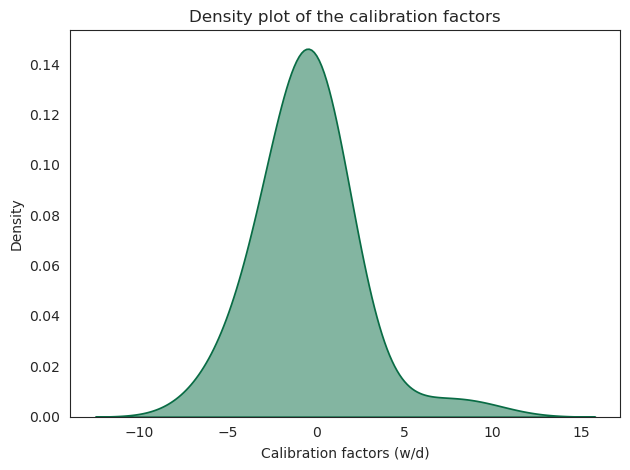

CPU times: user 11h 37min 34s, sys: 2min 11s, total: 11h 39min 45s
Wall time: 23min 19s


array([ 4.77112906e+03, -9.53001695e+02,  4.66773265e+02, -9.59943887e+02,
       -9.31524870e+02,  1.66778339e+02,  2.27854848e+02,  5.88458743e+02,
        4.83625300e+04,  1.38840582e+02, -6.46948176e+02, -4.73817456e+02,
        1.30804870e+03, -1.39658132e+03, -1.09711789e+03, -1.39828753e+03,
        3.03684417e+02,  1.69013837e+02,  2.15017998e+03, -1.51145834e+03,
        3.62103071e+03, -1.54128402e+03, -8.94978499e+02, -1.21245860e+02,
        1.08658906e+03, -7.66734632e+02, -1.02892603e+02, -5.40698192e+02,
        1.78286759e+02,  1.84816689e+02,  1.68901797e+01, -1.21604660e+03,
        9.93605896e+02, -8.18838138e+01,  2.71364663e+02,  1.46532179e+02,
       -1.00754616e+03,  1.00748039e+02,  1.97478013e+03,  5.94066084e+03,
        1.02219937e+03, -2.01261971e+01, -8.65621711e+02, -1.03445320e+03,
       -1.01055602e+02, -5.04383686e+02,  7.70252282e+01, -8.07377840e+01,
        7.23463243e+02,  1.60801184e+02, -1.33267739e+03, -1.52075326e+03,
       -1.36471091e+03, -

In [83]:
%%time
mc_logit.calibration(sampling_probabilities, calibration_matrix, calibration_target)

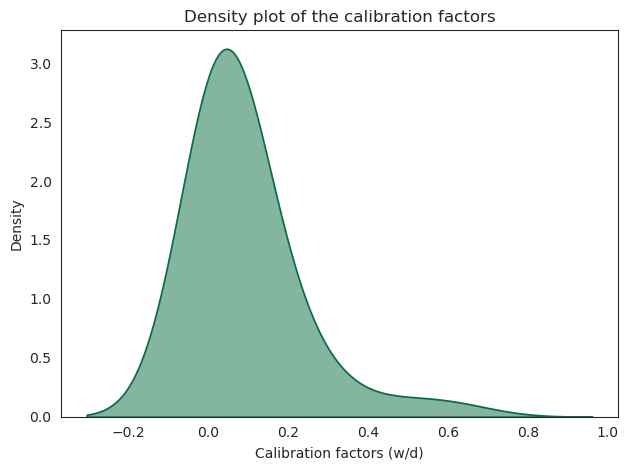

CPU times: user 1h 3min 3s, sys: 11.9 s, total: 1h 3min 15s
Wall time: 2min 6s


array([1.41281042e+02, 2.26582402e+00, 8.67792131e+01, 2.18700045e+00,
       2.46499603e+00, 3.41303679e+01, 8.03476727e+01, 2.35845125e+02,
       6.02447734e+03, 3.60924168e+01, 1.99797383e+01, 1.01315740e+01,
       1.94753060e+01, 5.35086039e+00, 1.19772500e+00, 6.43729091e+00,
       7.30945563e+01, 2.71468202e+01, 5.47555542e+01, 6.54674899e+00,
       9.19559621e+01, 5.50951542e+00, 4.77536095e+00, 1.12632298e+01,
       1.13402105e+02, 8.31346353e+00, 2.86261907e+01, 2.15117495e+01,
       4.07068355e+01, 5.29281184e+01, 2.09450560e+01, 7.01629549e+00,
       1.53996755e+02, 2.48126189e+01, 4.82292854e+01, 5.20347320e+01,
       1.37339626e+01, 2.82803181e+01, 5.46871230e+01, 1.06305728e+03,
       3.27221732e+02, 4.06410655e+01, 1.04960470e+01, 2.15626385e+00,
       2.52644650e+01, 1.27208154e+01, 3.10965147e+01, 3.02701405e+01,
       2.03567254e+02, 1.75941474e+02, 5.99224723e+00, 1.40943338e+01,
       2.46577548e+00, 4.51918887e+00, 2.16833789e+02, 7.13905962e+01,
      

In [84]:
%%time
mc_rr.calibration(sampling_probabilities, calibration_matrix, calibration_target)

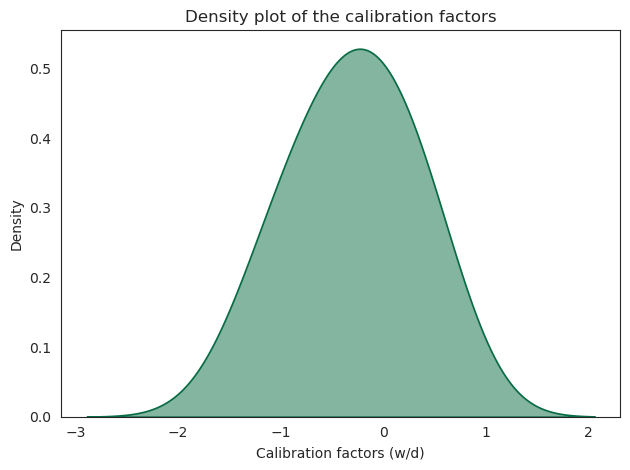

CPU times: user 21h 15min 21s, sys: 2min 6s, total: 21h 17min 28s
Wall time: 42min 35s


array([ 7.29770090e+01, -4.00784817e+02,  1.09851010e+02, -5.65021927e+02,
       -3.21274878e+02,  1.32515247e+02,  1.76330399e+02,  3.49233731e+02,
        2.65191270e+04, -3.12571736e+02, -2.50422339e+02, -9.10514457e+01,
        6.06320228e+01, -7.08319393e+02, -8.20573569e+02, -8.21229946e+02,
        2.11579634e+01, -1.06103578e+02, -1.26820570e+02, -2.06083144e+02,
        9.09001155e+01, -2.85007938e+02, -2.08308571e+02, -1.68507001e+02,
        3.01511159e+01, -3.20286244e+02, -1.50748490e+02, -4.76789419e+02,
        3.14417502e+01,  1.11383631e+02, -6.54303863e+01, -3.85750334e+02,
        4.61799593e+02, -9.61843383e+01, -1.69801017e+02, -1.10182419e+02,
       -4.45688068e+02, -5.36048395e+01, -6.68549817e+01,  5.49500544e+03,
        8.60277097e+02, -2.15954985e+02, -3.17039816e+02, -4.76486966e+02,
       -9.83412097e+01, -9.79340872e+01, -8.59844113e+01, -1.17483695e+02,
        1.51026773e+02,  1.82043062e+02, -3.10628661e+02, -2.32996709e+02,
       -3.48460927e+02, -

In [85]:
%%time
mc_lt.calibration(sampling_probabilities, calibration_matrix, calibration_target)

# Penalized Margin Calibration

In [86]:
mc_pen=MarginCalibration(penalty=.1, costs=costs)
mc_logit_pen=MarginCalibration("logit", .5, 1.5, penalty=.1, costs=costs)
mc_rr_pen=MarginCalibration("raking_ratio", penalty=.1, costs=costs)
mc_lt_pen=MarginCalibration("truncated_linear", .5, 1.5, penalty=.1, costs=costs)

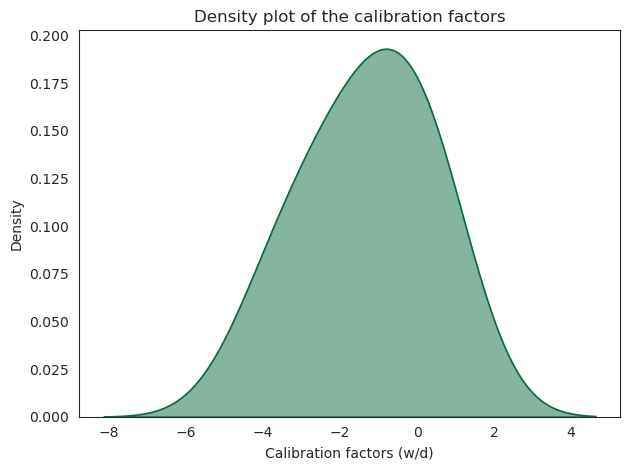

CPU times: user 6.47 s, sys: 23.5 ms, total: 6.49 s
Wall time: 263 ms


array([ 7.20879925e+01, -1.37005443e+03,  1.61660708e+02, -1.48825324e+03,
       -1.25817273e+03, -5.64753499e+02, -1.91763223e+02,  4.23071221e+02,
        6.45168665e+04, -3.71979470e+02, -6.39681203e+02, -1.05674754e+03,
        6.07655024e+02, -1.30319836e+03, -1.82139545e+03, -1.25034936e+03,
       -1.87955403e+02, -6.66712074e+02, -2.73717627e+02, -7.18603674e+02,
       -8.27246529e+01, -9.29518503e+02, -9.65223112e+02, -8.39408223e+02,
        3.71903343e+01, -1.11098349e+03, -4.44455743e+02, -6.27766617e+02,
       -5.08102731e+02, -2.97630377e+02, -4.23522654e+02, -1.07270755e+03,
        1.24145969e+03, -5.13101572e+02, -1.51182065e+02, -3.36088756e+02,
       -8.86756567e+02, -4.29715870e+02, -1.04700503e+02,  9.85553665e+03,
        1.39252528e+03, -4.55670922e+02, -1.09507482e+03, -1.46375832e+03,
       -7.00454494e+02, -8.44954742e+02, -2.86620465e+02, -3.25195966e+02,
        2.11135146e+02,  1.59160449e+02, -1.00434185e+03, -6.35612545e+02,
       -1.17269727e+03, -

In [87]:
%%time
mc_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

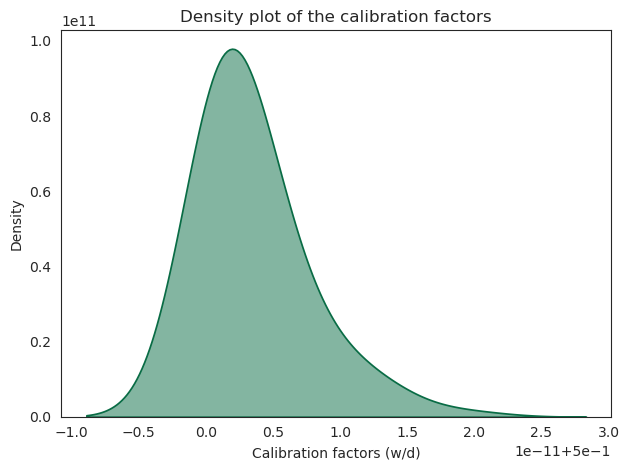

CPU times: user 6.76 s, sys: 19.7 ms, total: 6.78 s
Wall time: 691 ms


array([  275.18241825,   181.91030215,   759.45737329,   218.25194169,
         162.57768643,   225.3771535 ,   206.2262826 ,   545.99849719,
       32867.32817289,   564.41859969,   227.40675545,   245.69228193,
        1544.08306548,   338.14832092,   263.91619037,   427.29946131,
         463.04132609,   467.81886082,   246.57092299,   127.12255961,
         186.12407188,   155.96123467,   147.2358239 ,   168.5323157 ,
         179.72810591,   268.23488706,   180.53679371,   519.00866604,
         416.95371262,   174.43306103,   130.5943259 ,   226.41495915,
        1220.59754043,   175.82248622,   614.2173484 ,   278.62160243,
         360.08091726,   158.48410093,   133.91518575,  5474.3471812 ,
        1177.80542316,   364.81458189,   357.52325977,   185.85381804,
         307.25042154,   197.02061241,   132.01809443,   144.51176431,
         228.47858243,   149.60222669,   179.60130628,   167.70218341,
         151.77053921,   386.0118879 ,   357.2840045 ,   216.33441955,
      

In [88]:
%%time
mc_logit_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

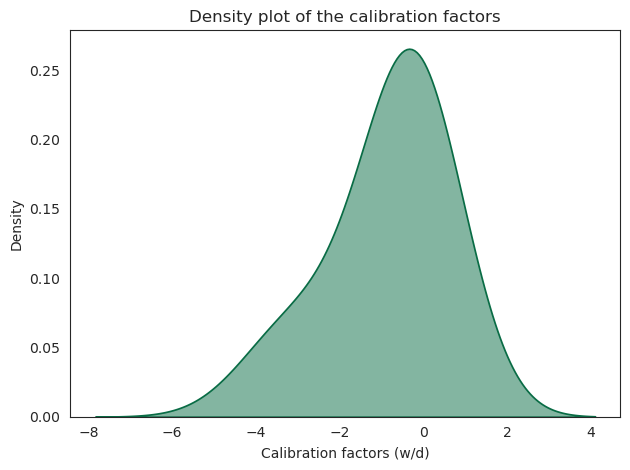

CPU times: user 6.74 s, sys: 27 ms, total: 6.77 s
Wall time: 480 ms


array([-2.98423615e+02, -1.76069430e+02, -7.42753851e+02, -1.47132297e+02,
       -1.87570980e+02, -1.61917063e+03, -8.46381035e+02, -2.75084403e+01,
        6.38534238e+04, -1.36450931e+03, -2.04226820e+02, -2.31436827e+03,
       -8.70480881e+02, -2.27455101e+03, -1.38102498e+02, -2.76790972e+03,
       -1.00233620e+03, -1.87534231e+03, -8.49961294e+02, -1.91730912e+02,
       -5.54121349e+02, -1.64315020e+02, -1.44130186e+02,  2.81142432e+02,
       -2.32232286e+02, -1.75819818e+03,  1.68766690e+01, -1.74514002e+03,
       -1.55727404e+03, -1.04221419e+03, -4.72601762e+01, -1.61738046e+01,
        6.24348659e+02,  9.68262507e+01, -1.00353620e+03, -1.06241031e+03,
       -2.02816613e+03,  2.03662829e+01, -2.47658120e+01,  9.31439924e+03,
        7.93862326e+02, -1.35815723e+03, -2.53955531e+03, -9.94184317e+01,
       -1.81453849e+03,  1.15972948e+02, -4.90317741e+01, -4.69963418e+01,
        2.31877795e+01, -8.41668518e+00, -1.09403808e+02, -9.43950240e+01,
       -2.38046507e+02, -

In [89]:
%%time
mc_rr_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

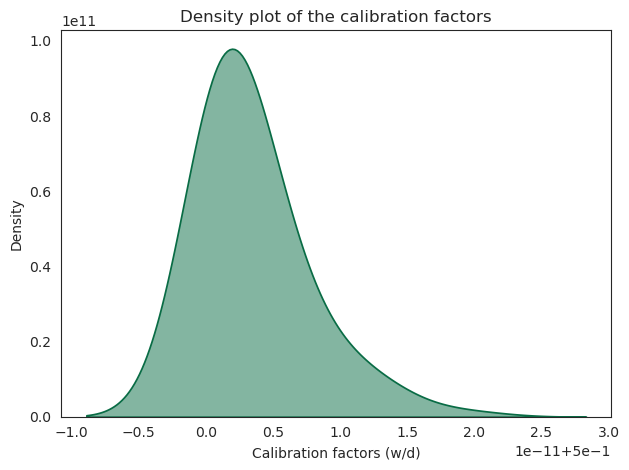

CPU times: user 7.21 s, sys: 3.45 ms, total: 7.21 s
Wall time: 693 ms


array([  275.18241825,   181.91030215,   759.45737329,   218.25194169,
         162.57768643,   225.3771535 ,   206.2262826 ,   545.99849719,
       32867.32817289,   564.41859969,   227.40675545,   245.69228193,
        1544.08306548,   338.14832092,   263.91619037,   427.29946131,
         463.04132609,   467.81886082,   246.57092299,   127.12255961,
         186.12407188,   155.96123467,   147.2358239 ,   168.5323157 ,
         179.72810591,   268.23488706,   180.53679371,   519.00866604,
         416.95371262,   174.43306103,   130.5943259 ,   226.41495915,
        1220.59754043,   175.82248622,   614.2173484 ,   278.62160243,
         360.08091726,   158.48410093,   133.91518575,  5474.3471812 ,
        1177.80542316,   364.81458189,   357.52325977,   185.85381804,
         307.25042154,   197.02061241,   132.01809443,   144.51176431,
         228.47858243,   149.60222669,   179.60130628,   167.70218341,
         151.77053921,   386.0118879 ,   357.2840045 ,   216.33441955,
      

In [90]:
%%time
mc_lt_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)